In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
match_events= pd.read_csv('/Users/tsovinarbabakhanyan/Desktop/TunisiaLocalChapter_UEFAEURO2024/Datasets/match_events.csv')

In [3]:
match_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6136 entries, 0 to 6135
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   matchid              6136 non-null   int64  
 1   hometeamname         6136 non-null   object 
 2   awayteamname         6136 non-null   object 
 3   event                6136 non-null   object 
 4   minute               6136 non-null   int64  
 5   phase                6136 non-null   int64  
 6   injuryminute         6136 non-null   int64  
 7   teamfromid           5797 non-null   float64
 8   teamtoid             1603 non-null   float64
 9   playerfromid         5791 non-null   float64
 10  playertoid           1592 non-null   float64
 11  time                 6136 non-null   object 
 12  matcheventattribute  93 non-null     object 
dtypes: float64(4), int64(4), object(5)
memory usage: 623.3+ KB


In [4]:
match_events.head()

,matchid,hometeamname,awayteamname,event,minute,phase,injuryminute,teamfromid,teamtoid,playerfromid,playertoid,time,matcheventattribute
0,2024442,Austria,North Macedonia,StartFirstHalf,0,1,0,NaN,NaN,NaN,NaN,2021-06-13T16:00:20.217,NaN
1,2024442,Austria,North Macedonia,Foul,4,1,0,59205.0,8.0,250039878.0,250003976.0,2021-06-13T16:03:45.897,NaN
2,2024442,Austria,North Macedonia,FreeKick,4,1,0,8.0,NaN,1909713.0,NaN,2021-06-13T16:03:56.853,NaN
3,2024442,Austria,North Macedonia,Foul,5,1,0,59205.0,8.0,250004363.0,101177.0,2021-06-13T16:04:44.217,NaN
4,2024442,Austria,North Macedonia,FreeKick,5,1,0,8.0,NaN,250065408.0,NaN,2021-06-13T16:04:54.533,NaN


In [5]:
categorical_col = ['hometeamname','awayteamname','event','time','matcheventattribute']

In [6]:
match_events = match_events.drop(columns=categorical_col)

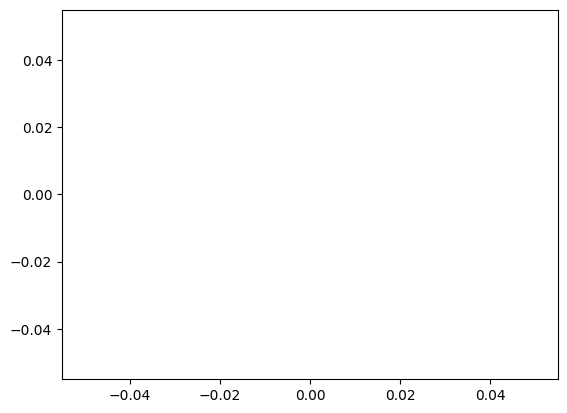

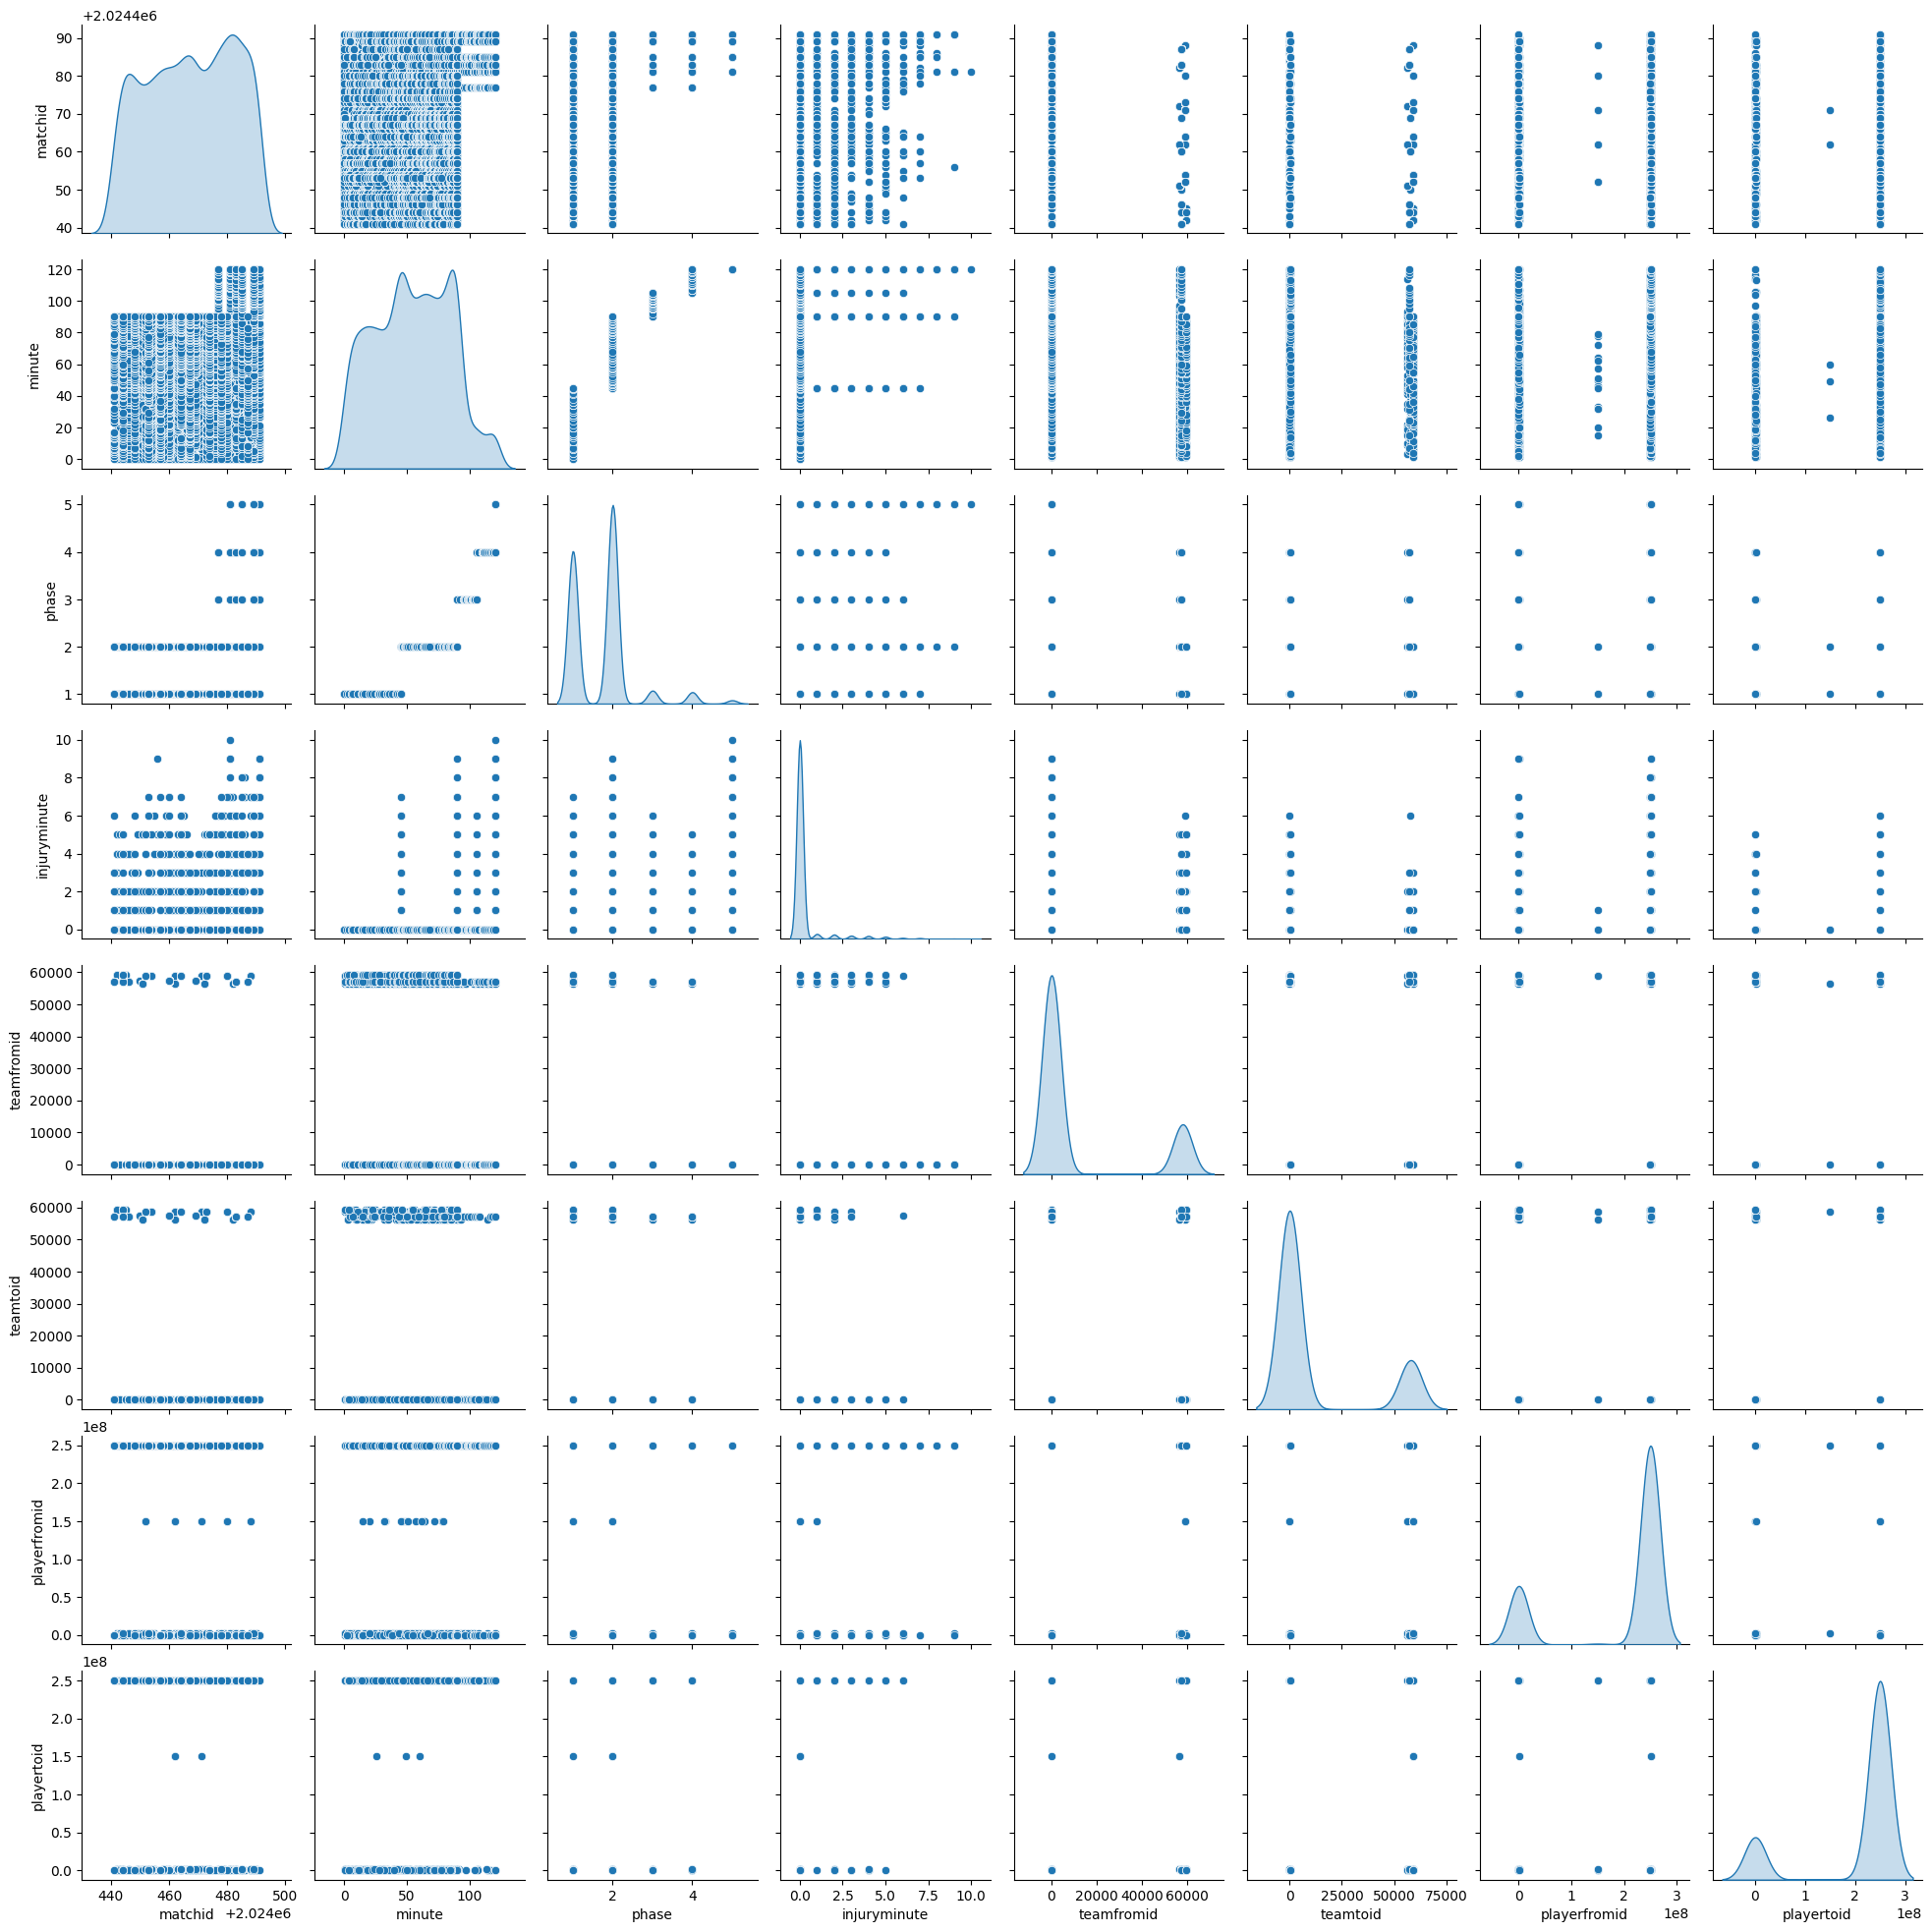

In [7]:
plt.plot(figsize=(16,6))
sns.pairplot(data=match_events,diag_kind='kde')

In [8]:
match_events = match_events.dropna()

In [9]:
X = match_events.drop('injuryminute',axis=1)
Y = match_events['injuryminute']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [12]:
X_train

,matchid,minute,phase,teamfromid,teamtoid,playerfromid,playertoid
1367,2024451,78,2,56370.0,56370.0,250033878.0,250063394.0
423,2024450,65,2,57451.0,13.0,97787.0,103704.0
34,2024442,35,1,8.0,59205.0,250020234.0,250031588.0
1567,2024484,42,1,47.0,39.0,250041771.0,250016833.0
3226,2024468,79,2,144.0,66.0,102221.0,250050378.0
...,...,...,...,...,...,...,...
252,2024479,19,1,13.0,110.0,250012551.0,250067295.0
2288,2024475,88,2,57.0,57.0,250029650.0,250019995.0
5112,2024485,100,3,128.0,128.0,250042877.0,250046574.0
5926,2024478,23,1,144.0,35.0,250112383.0,250065453.0


In [13]:
Y_train

1367    0
423     0
34      0
1567    0
3226    0
       ..
252     0
2288    0
5112    0
5926    0
3224    0
Name: injuryminute, Length: 1114, dtype: int64

In [14]:
X_test

,matchid,minute,phase,teamfromid,teamtoid,playerfromid,playertoid
3354,2024443,88,2,95.0,8.0,250112690.0,250075612.0
3122,2024458,86,2,66.0,66.0,250066739.0,250041741.0
2784,2024491,90,2,66.0,39.0,59142.0,250106939.0
491,2024462,45,1,58837.0,56370.0,1907136.0,74699.0
2868,2024489,17,1,122.0,66.0,250002704.0,250066739.0
...,...,...,...,...,...,...,...
105,2024442,90,2,8.0,8.0,250065408.0,103354.0
4664,2024474,46,2,109.0,109.0,250090285.0,250066342.0
2675,2024477,111,4,8.0,66.0,250065413.0,250050378.0
432,2024450,74,2,57451.0,13.0,250021669.0,250064006.0


In [15]:
Y_test

3354    0
3122    0
2784    6
491     0
2868    0
       ..
105     4
4664    0
2675    0
432     0
5333    2
Name: injuryminute, Length: 478, dtype: int64

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train,Y_train)

LinearRegression()

In [19]:
test_predictions = model.predict(X_test)

In [20]:
test_predictions

array([ 0.40169436,  0.39984985,  0.47546113,  0.25903146, -0.02257469,
        0.29735337,  0.23638604, -0.07552148,  0.20733835,  0.28218519,
        0.10783264,  0.36658681, -0.07121676,  0.14108242,  0.03032711,
        0.36296659,  0.24560091, -0.10827815,  0.01560209, -0.03284408,
       -0.0299218 ,  0.36138582, -0.03011666,  0.17905987,  0.17571038,
       -0.06536598,  0.29701867,  0.21629233, -0.14217331,  0.43791896,
        0.1823416 , -0.16829178,  0.03958036,  0.03875123,  0.41085079,
        0.07122904,  0.17904882,  0.24699479,  0.34232207,  0.20639478,
        0.40440348,  0.37760745,  0.14961751, -0.00337531,  0.37584645,
        0.13574137, -0.17048351,  0.17628278,  0.40218633,  0.19099585,
        0.21253657,  0.46618547, -0.24223925,  0.19515293,  0.12179192,
        0.19542911,  0.29164827,  0.36019777, -0.03782004,  0.14066064,
        0.06769517, -0.08210138,  0.34595491,  0.34395563,  0.39501843,
        0.45352604,  0.42037827,  0.12059305,  0.13984485, -0.14

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [22]:
MAE = mean_absolute_error(Y_test,test_predictions)
MSE = mean_squared_error(Y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [23]:
MAE

0.2938508211993354

In [24]:
MSE

0.41531452681399683

In [25]:
RMSE

0.6444490102513906

In [26]:
match_events['injuryminute'].mean()

0.1350502512562814

<Axes: >

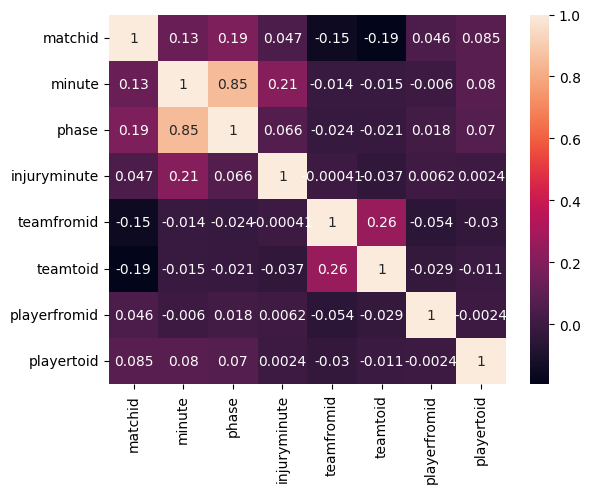

In [27]:
sns.heatmap(data=match_events.corr(),annot=True)

<Axes: >

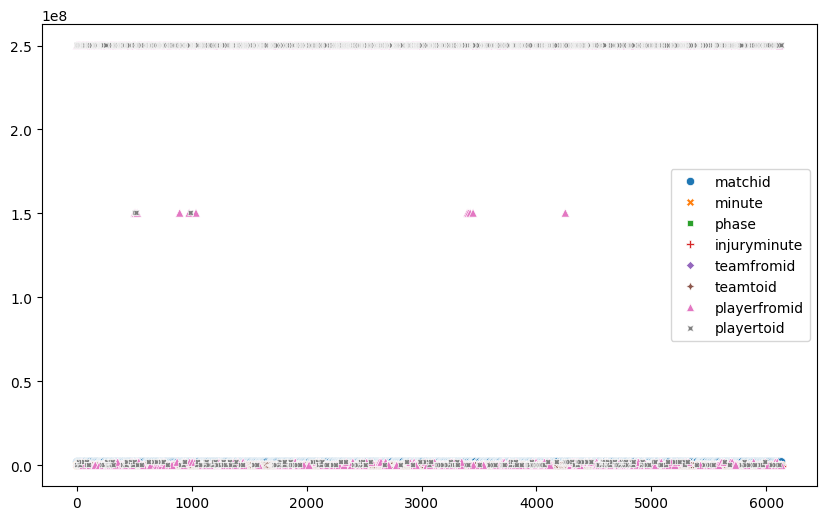

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=match_events)

In [29]:
match_events.corr()

,matchid,minute,phase,injuryminute,teamfromid,teamtoid,playerfromid,playertoid
matchid,1.000000,0.129937,0.186546,0.046549,-0.151619,-0.193345,0.045861,0.085036
minute,0.129937,1.000000,0.853078,0.208231,-0.014231,-0.014803,-0.006003,0.079648
phase,0.186546,0.853078,1.000000,0.065980,-0.024397,-0.020527,0.017667,0.070099
injuryminute,0.046549,0.208231,0.065980,1.000000,-0.000408,-0.037277,0.006175,0.002363
teamfromid,-0.151619,-0.014231,-0.024397,-0.000408,1.000000,0.259638,-0.053734,-0.030398
teamtoid,-0.193345,-0.014803,-0.020527,-0.037277,0.259638,1.000000,-0.029140,-0.011033
playerfromid,0.045861,-0.006003,0.017667,0.006175,-0.053734,-0.029140,1.000000,-0.002425
playertoid,0.085036,0.079648,0.070099,0.002363,-0.030398,-0.011033,-0.002425,1.000000


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import ElasticNet

In [33]:
base_elastic_model = ElasticNet()

In [34]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [37]:
grid_model.fit(scaled_X_train,Y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [38]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [39]:
y_pred = grid_model.predict(scaled_X_test)

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [41]:
mean_absolute_error(Y_test,y_pred)

0.263694942633149

In [42]:
np.sqrt(mean_squared_error(Y_test,y_pred))

0.6533419024238302

In [43]:
np.mean(match_events['injuryminute'])

0.1350502512562814

<Axes: ylabel='count'>

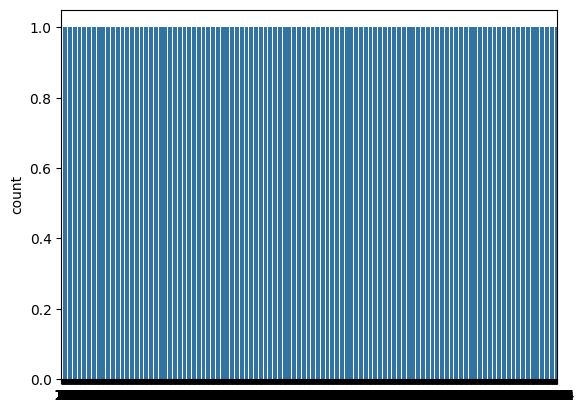

In [44]:
sns.countplot(data=match_events['injuryminute'])

<Axes: >

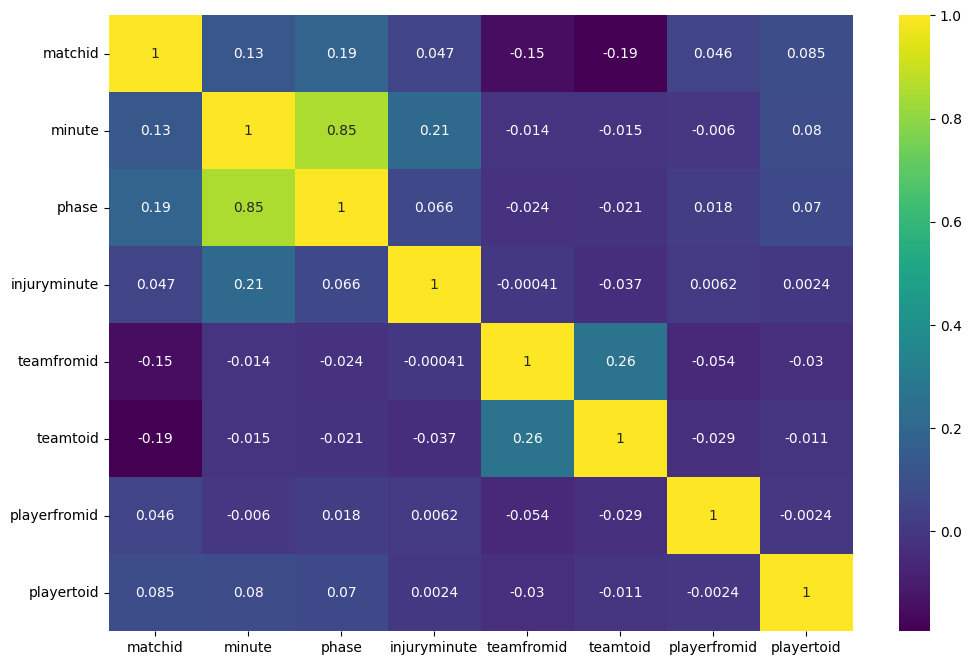

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(match_events.corr(),cmap='viridis',annot=True)

In [46]:
x = match_events.drop('matchid',axis=1)
y = match_events['matchid']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [49]:
scaler = StandardScaler()

In [50]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [51]:
from sklearn.linear_model import LogisticRegressionCV 
log_model = LogisticRegressionCV()

In [52]:
log_model.fit(scaled_X_train,Y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

LogisticRegressionCV()

In [53]:
log_model.C_

array([10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000.])

In [54]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [55]:
log_model.coef_

array([[ 5.37422184e-01, -9.50422490e-03,  1.36429726e+00,
         8.44212211e+00,  7.87962409e+00, -7.32968949e-02,
         8.96799103e-02],
       [-1.45786815e-01,  3.76516114e-01,  1.59608581e+00,
         8.37990397e+00,  7.87082265e+00,  1.28566304e-01,
        -7.27488750e-01],
       [-4.86779175e-01, -8.28402513e-02,  1.06687019e+00,
        -1.27826360e+01, -1.52576078e+01, -5.03881511e-01,
        -5.93043119e-01],
       [ 1.24703472e+00, -2.16228150e+00,  1.02025486e+00,
         1.82351886e+01,  1.20011504e+01, -6.28459879e-02,
        -3.11440182e-01],
       [ 4.54348127e-01, -9.76030295e-02,  8.45298425e-01,
         8.51200289e+00,  8.06842270e+00, -1.56548624e-01,
         2.04550214e-01],
       [ 2.30799779e-01, -1.99290799e-01,  1.06363210e+00,
         8.35588372e+00,  7.84979944e+00, -3.46084964e-01,
        -1.41888734e-01],
       [ 1.28743747e-01, -1.90609701e-01,  9.56141621e-01,
         4.46696627e+00,  3.26418397e+00,  7.61154148e+00,
         1.5443756

In [56]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [57]:
coefs = coefs.sort_values()

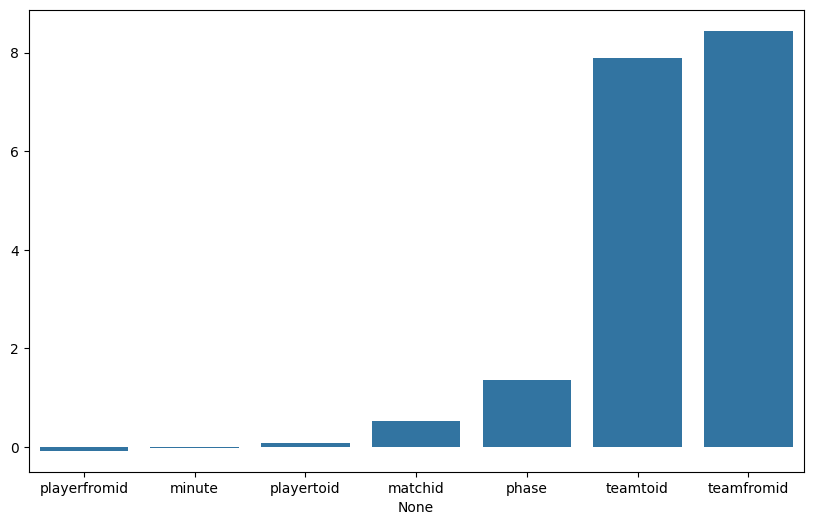

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values);

In [59]:
from sklearn.metrics import confusion_matrix,classification_report

In [60]:
y_pred = log_model.predict(scaled_X_test)

In [61]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 2, 0, 1],
       [0, 0, 0, ..., 2, 0, 0]])

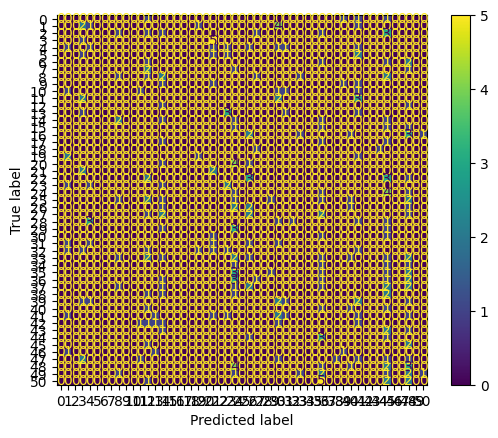

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [63]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

     2024441       0.00      0.00      0.00         4
     2024442       0.00      0.00      0.00         9
     2024443       0.00      0.00      0.00         8
     2024444       0.08      0.17      0.11         6
     2024445       0.12      0.12      0.12         8
     2024446       0.00      0.00      0.00         5
     2024447       0.00      0.00      0.00         5
     2024448       0.00      0.00      0.00         4
     2024449       0.12      0.12      0.12         8
     2024450       0.00      0.00      0.00         4
     2024451       0.00      0.00      0.00         5
     2024452       0.00      0.00      0.00         7
     2024453       0.00      0.00      0.00         2
     2024454       0.00      0.00      0.00         6
     2024455       0.05      0.17      0.08         6
     2024456       0.00      0.00      0.00         4
     2024457       0.00      0.00      0.00         8
     2024458       0.00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
scaler = StandardScaler()

In [67]:
knn = KNeighborsClassifier()

In [68]:
operations = [('scaler',scaler),('knn',knn)]

In [69]:
from sklearn.pipeline import Pipeline

In [70]:
pipe = Pipeline(operations)

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
k_values = list(range(1,30))

In [73]:
param_grid = {'knn__n_neighbors': k_values}

In [74]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [75]:
full_cv_classifier.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [76]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [77]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.12650301, 0.08563841, 0.07385827, 0.07700479, 0.07149606,
       0.0770017 , 0.08093253, 0.06992435, 0.06050641, 0.05893469,
       0.06443724, 0.05736606, 0.05736606, 0.05971592, 0.06050332,
       0.05892543, 0.06285317, 0.0659966 , 0.06756832, 0.06599352,
       0.06521847, 0.06207195, 0.06128763, 0.06364675, 0.06522155,
       0.06679018, 0.06678709, 0.06285317, 0.05892852])

Text(0, 0.5, 'Accuracy')

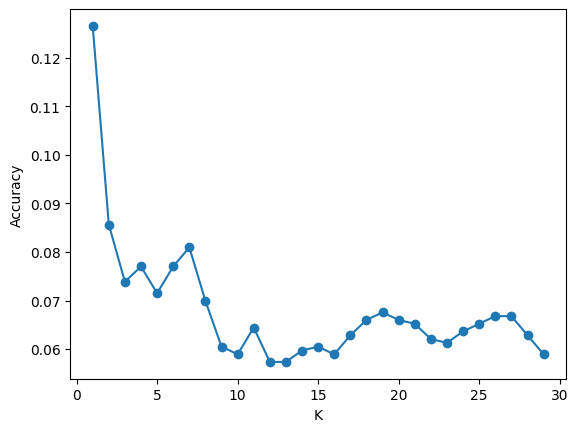

In [78]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

In [79]:
pred = full_cv_classifier.predict(X_test)

In [80]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [81]:
confusion_matrix(Y_test,pred)

array([[1, 0, 1, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 2],
       [0, 0, 1, ..., 0, 1, 3]])

In [82]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

     2024441       0.33      0.25      0.29         4
     2024442       0.43      0.33      0.38         9
     2024443       0.17      0.12      0.14         8
     2024444       0.50      0.33      0.40         6
     2024445       0.00      0.00      0.00         8
     2024446       0.00      0.00      0.00         5
     2024447       0.00      0.00      0.00         5
     2024448       0.00      0.00      0.00         4
     2024449       0.12      0.12      0.12         8
     2024450       0.00      0.00      0.00         4
     2024451       0.25      0.20      0.22         5
     2024452       0.14      0.14      0.14         7
     2024453       0.25      1.00      0.40         2
     2024454       0.10      0.17      0.12         6
     2024455       0.00      0.00      0.00         6
     2024456       0.17      0.50      0.25         4
     2024457       0.17      0.12      0.14         8
     2024458       0.00    